## Exercise 7

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics

X = pd.read_csv("agaricus-lepiota.csv")
y = X.pop('edibility')
X_fac = pd.DataFrame(X)
for column in X.columns:
    X_fac[column] = pd.Categorical(X[column].factorize()[0])
X_fac = pd.DataFrame(preprocessing.scale(X_fac), columns=X_fac.columns)

In [2]:
import matplotlib.pyplot as plt

y_rand = np.zeros(18)
y_sil = np.zeros(18)
for i in range(2, 20):
    km = KMeans(n_clusters=i)
    km.fit(X_fac)
    y_km = km.predict(X_fac)
    centers = km.cluster_centers_
    labels = km.labels_
    y_rand[i - 2] = metrics.adjusted_rand_score(y, labels)
    y_sil[i - 2] = metrics.silhouette_score(X_fac, labels, metric='euclidean')
    print("n = %i, rand: %f, sil: %f" % (i, y_rand[i - 2], y_sil[i - 2]))

n = 2, rand: 0.459597, sil: 0.260971
n = 3, rand: 0.487192, sil: 0.276301
n = 4, rand: 0.387009, sil: 0.323526
n = 5, rand: 0.292474, sil: 0.334617
n = 6, rand: 0.259309, sil: 0.320794
n = 7, rand: 0.246812, sil: 0.353998
n = 8, rand: 0.241335, sil: 0.368649
n = 9, rand: 0.262147, sil: 0.368210
n = 10, rand: 0.200137, sil: 0.338859
n = 11, rand: 0.221915, sil: 0.339558
n = 12, rand: 0.178979, sil: 0.315954
n = 13, rand: 0.144482, sil: 0.253344
n = 14, rand: 0.153674, sil: 0.298498
n = 15, rand: 0.205424, sil: 0.337742
n = 16, rand: 0.147361, sil: 0.271251
n = 17, rand: 0.135001, sil: 0.275400
n = 18, rand: 0.146511, sil: 0.300626
n = 19, rand: 0.129337, sil: 0.263809


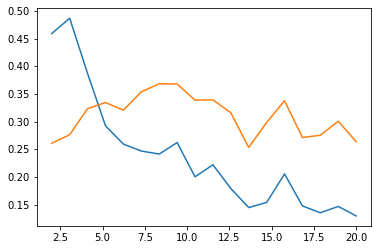

In [3]:
X_plot = np.linspace(2, 20, 18)
plt.plot(X_plot, y_rand)
plt.plot(X_plot, y_sil)
plt.show()

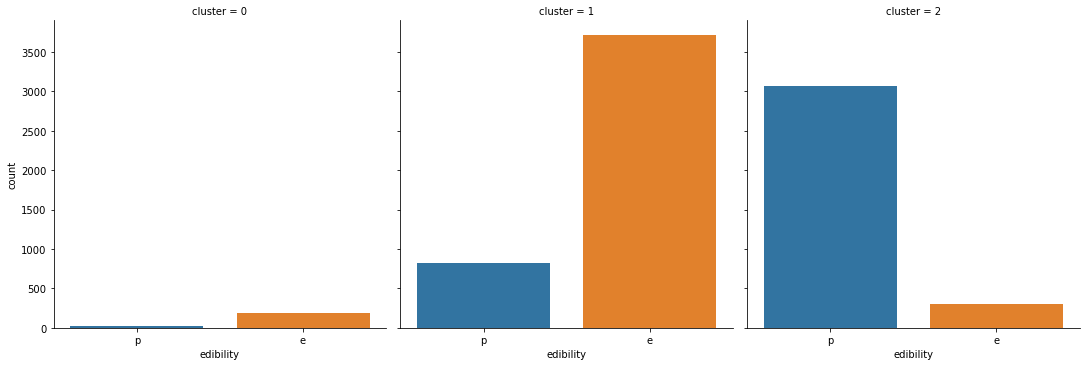

In [4]:
import seaborn as sns

k_rand = max(range(len(y_rand)), key=y_rand.__getitem__) + 2

kmeans = KMeans(n_clusters=k_rand)
kmeans.fit(X_fac)
y_kmeans = kmeans.predict(X_fac)
centers = kmeans.cluster_centers_

cluster_df = pd.DataFrame()
cluster_df['cluster'] = y_kmeans
cluster_df['edibility'] = y
sns.catplot(col='cluster', y=None, x='edibility', data=cluster_df, kind='count')

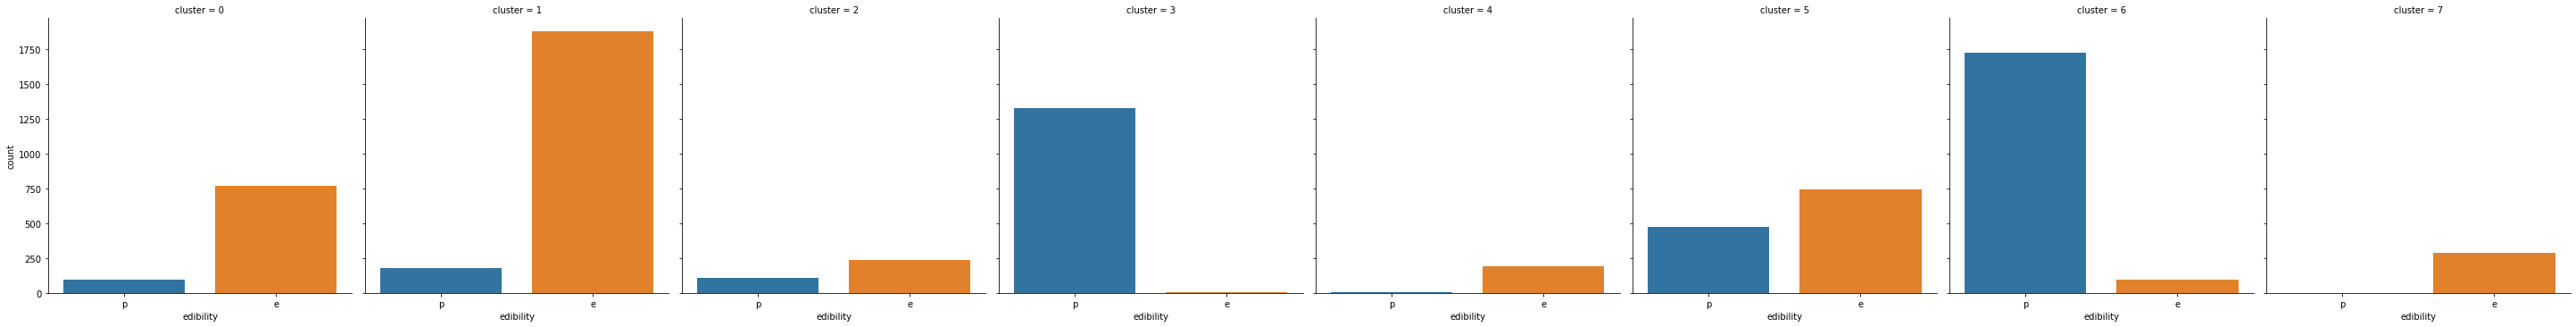

In [5]:
k_sil = max(range(len(y_sil)), key=y_sil.__getitem__) + 2

kmeans = KMeans(n_clusters=k_sil)
kmeans.fit(X_fac)
y_kmeans = kmeans.predict(X_fac)
centers = kmeans.cluster_centers_

cluster_df = pd.DataFrame()
cluster_df['cluster'] = y_kmeans
cluster_df['edibility'] = y
sns.catplot(col='cluster', y=None, x='edibility', data=cluster_df, kind='count')

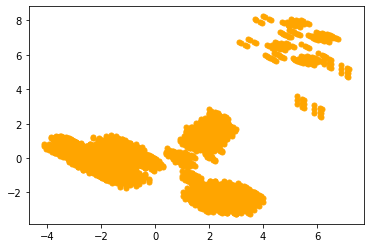

In [6]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_fac)
X_pca = pca.transform(X_fac)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='orange', s=25)
plt.show()

In [7]:
y_pca_rand = np.zeros(18)
y_pca_sil = np.zeros(18)
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_pca)
    y_kmeans = kmeans.predict(X_pca)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    y_pca_rand[i - 2] = metrics.adjusted_rand_score(y, labels)
    y_pca_sil[i - 2] = metrics.silhouette_score(X_fac, labels, metric='euclidean')
    print("n = %i, rand: %f, sil: %f" % (i, y_pca_rand[i - 2], y_pca_sil[i - 2]))

n = 2, rand: 0.457596, sil: 0.260873
n = 3, rand: 0.365885, sil: 0.301918
n = 4, rand: 0.373946, sil: 0.315362
n = 5, rand: 0.267921, sil: 0.247571
n = 6, rand: 0.241824, sil: 0.245757
n = 7, rand: 0.235451, sil: 0.273637
n = 8, rand: 0.187940, sil: 0.213800
n = 9, rand: 0.203365, sil: 0.223386
n = 10, rand: 0.171298, sil: 0.168575
n = 11, rand: 0.172590, sil: 0.166188
n = 12, rand: 0.163794, sil: 0.142078
n = 13, rand: 0.169888, sil: 0.149608
n = 14, rand: 0.155262, sil: 0.146484
n = 15, rand: 0.119727, sil: 0.085796
n = 16, rand: 0.117727, sil: 0.075826
n = 17, rand: 0.111697, sil: 0.083109
n = 18, rand: 0.111385, sil: 0.073262
n = 19, rand: 0.098393, sil: 0.082731


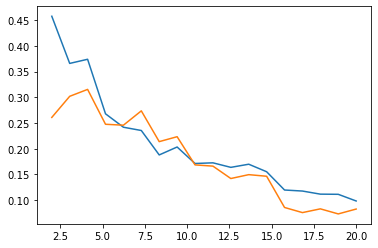

In [8]:
x = np.linspace(2, 20, 18)
plt.plot(X_plot, y_pca_rand)
plt.plot(X_plot, y_pca_sil)
plt.show()

(8124, 1)


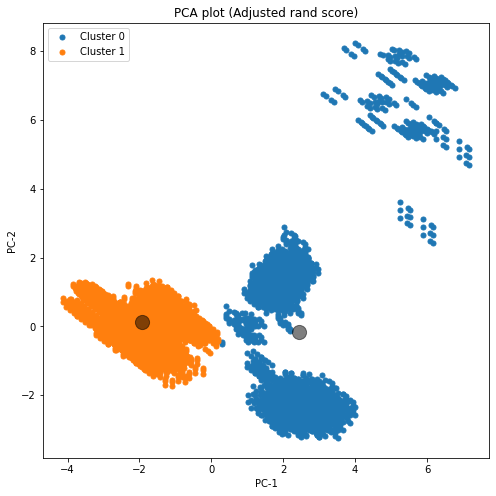

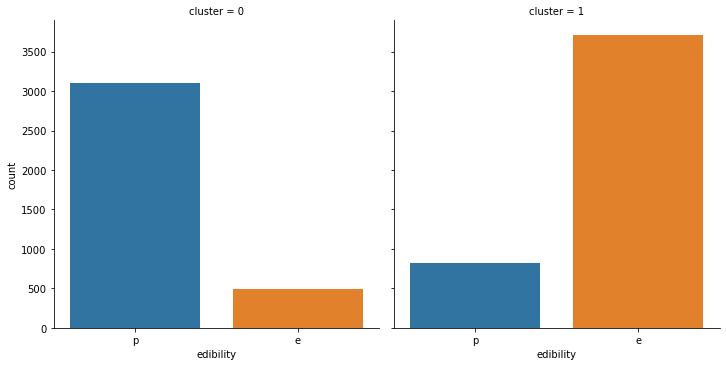

In [9]:
k_pca_rand = max(range(len(y_pca_rand)), key=y_pca_rand.__getitem__) + 2

kmeans = KMeans(n_clusters=k_pca_rand)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_title("PCA plot (Adjusted rand score)")
ax.set_xlabel("PC-1")
ax.set_ylabel("PC-2")

pc_x = X_pca[:, 0]
pc_y = X_pca[:, 1]

for i in range(k_pca_rand):
    selection = np.where(y_kmeans == i)
    ax.scatter(pc_x[selection], pc_y[selection], s=25, label='Cluster '+str(i))
 
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, edgecolor='black')
ax.legend()

cluster_df = pd.DataFrame()
cluster_df['cluster'] = y_kmeans
print(cluster_df.shape)
cluster_df['edibility'] = y
sns.catplot(col='cluster', y=None, x='edibility', data=cluster_df, kind='count')

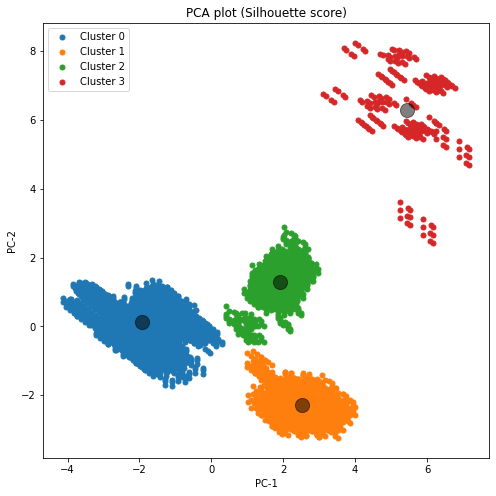

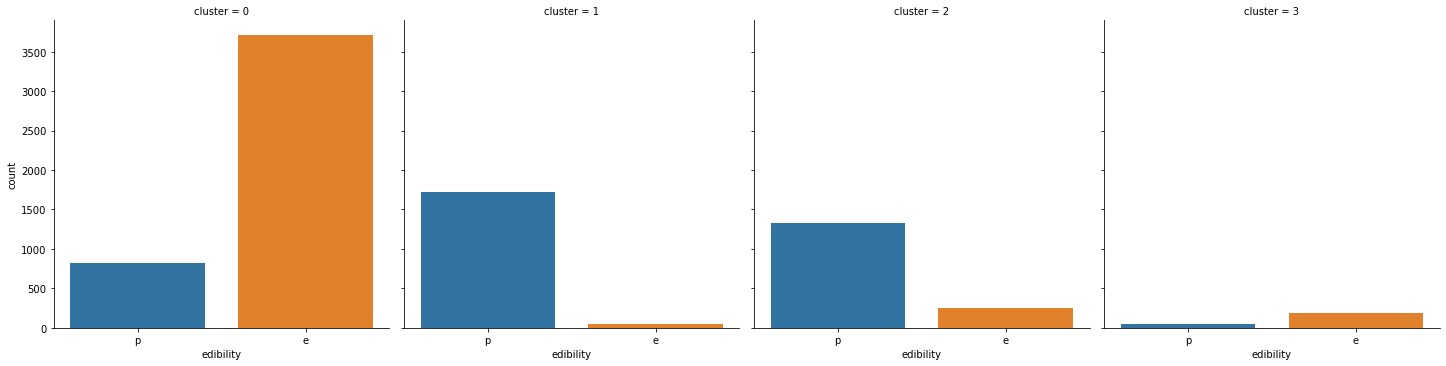

In [10]:
k_pca_sil = max(range(len(y_pca_sil)), key=y_pca_sil.__getitem__) + 2

kmeans = KMeans(n_clusters=k_pca_sil)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_title("PCA plot (Silhouette score)")
ax.set_xlabel("PC-1")
ax.set_ylabel("PC-2")

pc_x = X_pca[:, 0]
pc_y = X_pca[:, 1]

for i in range(k_pca_sil):
    selection = np.where(y_kmeans == i)
    ax.scatter(pc_x[selection], pc_y[selection], s=25, label='Cluster '+str(i))
   
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, edgecolor='black')
ax.legend()

cluster_df = pd.DataFrame()
cluster_df['cluster'] = y_kmeans
cluster_df['edibility'] = y
sns.catplot(col='cluster', y=None, x='edibility', data=cluster_df, kind='count')